In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [89]:
titanic = pd.read_csv('/Users/sangdonlee/Github/iod/materials/data/titanic_train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


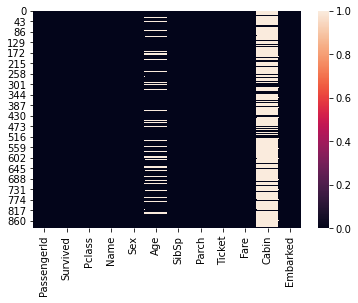

In [7]:
sns.heatmap(titanic.isnull())

In [9]:
titanic.groupby('Sex')['Age'].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [12]:
titanic.groupby('Pclass')['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [19]:
survived = titanic[titanic['Survived'] == 1]['Sex'].value_counts(normalize = True)
dead = titanic[titanic['Survived']==0]['Sex'].value_counts(normalize = True)
print(survived)
print(dead)

female    0.681287
male      0.318713
Name: Sex, dtype: float64
male      0.852459
female    0.147541
Name: Sex, dtype: float64


In [20]:
df = pd.DataFrame([survived, dead])

In [21]:
df.index = ['Survived', 'Dead']

In [22]:
df

,female,male
Survived,0.681287,0.318713
Dead,0.147541,0.852459


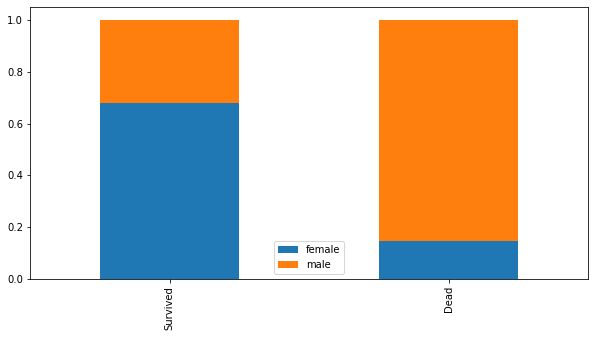

In [23]:
df.plot(kind='bar', stacked=True, figsize=(10,5))

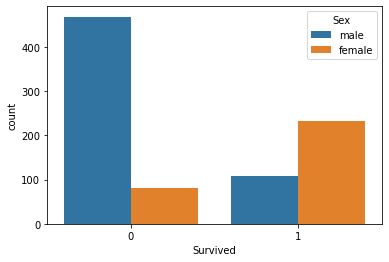

In [30]:
sns.countplot(x='Survived', hue='Sex',data=titanic)

In [24]:
## for Pclass
p_survived = titanic[titanic['Survived'] == 1]['Pclass'].value_counts(normalize = True)
p_dead = titanic[titanic['Survived']==0]['Pclass'].value_counts(normalize = True)
print(p_survived)
print(p_dead)

1    0.397661
3    0.347953
2    0.254386
Name: Pclass, dtype: float64
3    0.677596
2    0.176685
1    0.145719
Name: Pclass, dtype: float64


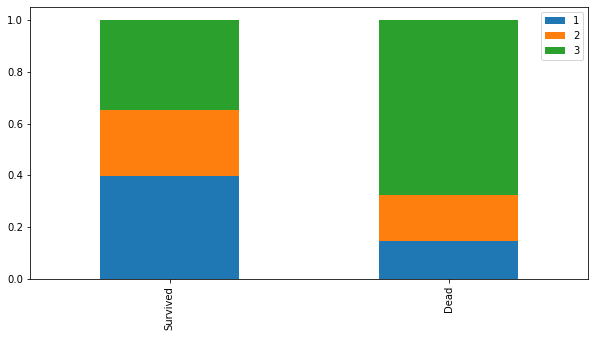

In [26]:
df_p = pd.DataFrame([p_survived, p_dead])
df_p.index = ['Survived', 'Dead']
df_p.plot(kind='bar', stacked=True, figsize=(10,5))

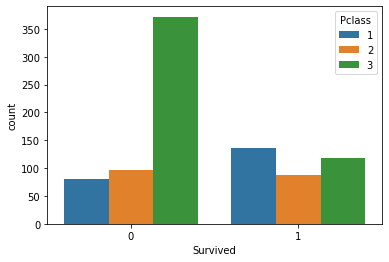

In [27]:
sns.countplot(x='Survived', hue='Pclass', data=titanic)

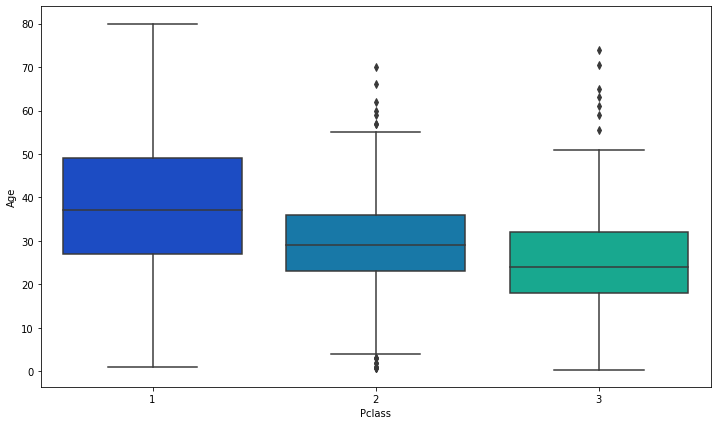

In [32]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=titanic, palette='winter')

In [34]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else: 
            return 24
    else:
        return Age

In [36]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

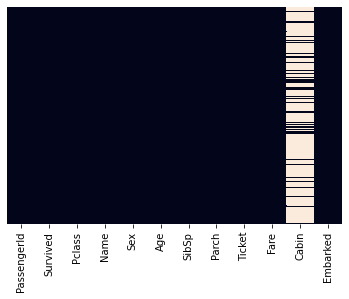

In [37]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False)

In [38]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
titanic.drop('Cabin', axis=1, inplace=True)

In [40]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [59]:
sex = pd.get_dummies(titanic['Sex'], drop_first = True)
embarked = pd.get_dummies(titanic['Pclass'], drop_first=True)

In [60]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [57]:
train = pd.concat([titanic, sex, embarked], axis=1)

In [58]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0,0


In [61]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [62]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,2,3
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,1,0
887,888,1,1,19.0,0,0,30.0000,0,0,0
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


In [67]:
train.rename(columns={2: 'Q', 3 : 'S'}, inplace = True)

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size=0.30, random_state=101)

In [71]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       154
           1       0.80      0.65      0.72       114

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.79      0.78      0.78       268



In [74]:
import statsmodels.api as sm

# Function to calculate VIF
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

In [75]:
calculate_vif(train)

,Var,Vif
2,Pclass,209.84
9,S,55.87
8,Q,14.80
6,Fare,1.74
1,Survived,1.66
7,male,1.52
3,Age,1.35
5,Parch,1.32
4,SibSp,1.30
0,PassengerId,1.01


In [78]:
train.drop(columns=['Pclass', 'S', 'Q'], inplace=True)

In [187]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [79]:
calculate_vif(train)

,Var,Vif
2,Age,4.19
0,PassengerId,3.38
1,Survived,1.87
5,Fare,1.67
4,Parch,1.54
3,SibSp,1.47
6,male,0.33


In [87]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

imputer = SimpleImputer(missing_values = np.nan, strategy='median')

In [90]:
titanic_age = np.array(titanic['Age']).reshape(-1,1)

In [91]:
imputer.fit(titanic_age)

SimpleImputer(strategy='median')

In [92]:
titanic_age = imputer.transform(titanic_age)

In [93]:
titanic_age

array([[22.  ],
       [38.  ],
       [26.  ],
       [35.  ],
       [35.  ],
       [28.  ],
       [54.  ],
       [ 2.  ],
       [27.  ],
       [14.  ],
       [ 4.  ],
       [58.  ],
       [20.  ],
       [39.  ],
       [14.  ],
       [55.  ],
       [ 2.  ],
       [28.  ],
       [31.  ],
       [28.  ],
       [35.  ],
       [34.  ],
       [15.  ],
       [28.  ],
       [ 8.  ],
       [38.  ],
       [28.  ],
       [19.  ],
       [28.  ],
       [28.  ],
       [40.  ],
       [28.  ],
       [28.  ],
       [66.  ],
       [28.  ],
       [42.  ],
       [28.  ],
       [21.  ],
       [18.  ],
       [14.  ],
       [40.  ],
       [27.  ],
       [28.  ],
       [ 3.  ],
       [19.  ],
       [28.  ],
       [28.  ],
       [28.  ],
       [28.  ],
       [18.  ],
       [ 7.  ],
       [21.  ],
       [49.  ],
       [29.  ],
       [65.  ],
       [28.  ],
       [21.  ],
       [28.5 ],
       [ 5.  ],
       [11.  ],
       [22.  ],
       [38.  ],
       [

In [94]:
titanic['Age'] = titanic_age

In [95]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [96]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [163]:
def one_hotencode(data, col):
    onehotencoder = OneHotEncoder()
    X = onehotencoder.fit_transform(data[col].values.reshape(-1,1)).toarray()
    dfOneHot = pd.DataFrame(X, columns = [col+'_'+str(int(i)) for i in range(X.shape[1])])
    df = pd.concat([data, dfOneHot], axis=1)
    f= df.drop([col], axis=1)
    return f

In [167]:
new1 = one_hotencode(titanic, 'Sex')

In [168]:
new2 = one_hotencode(new1, 'Pclass')

In [169]:
new2

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_0,Sex_1,Pclass_0,Pclass_1,Pclass_2
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1.0,0.0,0.0,1.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1.0,0.0,1.0,0.0,0.0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,0.0,0.0,0.0,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1.0,0.0,1.0,0.0,0.0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,0.0,1.0,0.0,1.0,0.0
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,1.0,0.0,1.0,0.0,0.0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,NaN,S,1.0,0.0,0.0,0.0,1.0
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,0.0,1.0,1.0,0.0,0.0


In [173]:
new2.Embarked.fillna('S', inplace=True)

In [174]:
new3 = one_hotencode(new2, 'Embarked')

In [ ]:
new3.drop(columns=['Name', 'Ticket','Cabin'], axis=1, inplace=True)

In [182]:
new3

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_0,Sex_1,Pclass_0,Pclass_1,Pclass_2,Embarked_0,Embarked_1,Embarked_2
0,1,0,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,1,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,4,1,35.0,1,0,53.1000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5,0,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,13.0000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
887,888,1,19.0,0,0,30.0000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
888,889,0,28.0,1,2,23.4500,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
889,890,1,26.0,0,0,30.0000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [184]:
new3.drop(columns=['Sex_0', 'Pclass_0', 'Embarked_0'], axis=1, inplace=True)

In [185]:
calculate_vif(new3)

,Var,Vif
10,Embarked_2,5.00
2,Age,4.95
8,Pclass_2,3.99
0,PassengerId,3.73
6,Sex_1,3.63
5,Fare,2.10
7,Pclass_1,2.06
1,Survived,2.00
4,Parch,1.63
9,Embarked_1,1.59


In [208]:
titanic_2 = pd.read_csv('/Users/sangdonlee/Github/iod/materials/data/titanic_train.csv')

In [209]:
by_sex_class = titanic_2.groupby(['Sex','Pclass'])  ## create groupby object

In [204]:
titanic_2.groupby(['Sex','Pclass'])['Age'].median() ## just to check the groupby Sex and Pclass, Age median

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [210]:
## impute_median function, 

def impute_median(series):
    return series.fillna(series.median())


In [217]:
titanic_2['new_age'] = by_sex_class.Age.transform(impute_median)

In [206]:
by_sex_class.Age.transform

<bound method SeriesGroupBy.transform of <pandas.core.groupby.generic.SeriesGroupBy object at 0x7fed48f1c390>>

In [218]:
titanic_2.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new_age
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S,33.0
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,22.0
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,28.0
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,25.0
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,39.0
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,NaN,S,21.5
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q,32.0


In [219]:
titanic_2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
new_age          0
dtype: int64

In [220]:
titanic_2['Age'].equals(titanic_2['new_age'])

True